In [2]:
from sklearn import datasets
data_boston = datasets.load_boston()

In [3]:
print(data_boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df_boston = pd.DataFrame(data_boston.data, columns = data_boston.feature_names)
df_boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:

df_target = pd.DataFrame(data_boston.target, columns = {'MED'})
df_target.head()

,MED
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df_boston, df_target, test_size = 0.3)
#guarda 30% de los datos para el testo, data frame con variables predictivas, 
#variables predictivas para el testeo, variables objetibo a utilizar


In [9]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
459,6.80117,0.0,18.10,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,396.90,14.70
401,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32
228,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df_boston, df_target, test_size = 0.3, random_state = 3)

In [11]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
359,4.26131,0.0,18.10,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


In [12]:
print(len(df_boston))
print(len(X_train))

506
354


In [13]:
506*0.7

354.2

In [14]:
Y_train.head()

,MED
359,22.6
374,13.8
98,43.8
273,35.2
329,22.6


In [15]:
from sklearn import linear_model

In [16]:
ln = linear_model.LinearRegression()
model = ln.fit(X_train, Y_train)

In [17]:
predictions = model.predict(X_test)

Text(0,0.5,'Predicted Y')

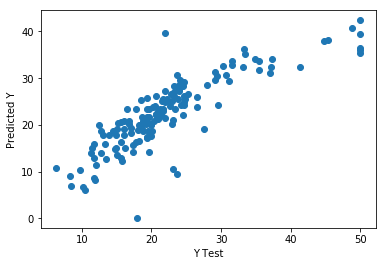

In [18]:
plt.scatter(Y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [19]:
model.score(X_test, Y_test)

0.7146895989294322

In [20]:
model.coef_


array([[-1.28899229e-01,  4.62536564e-02, -5.41974027e-02,
         3.83208843e+00, -1.24514995e+01,  3.72790367e+00,
         7.37824474e-03, -1.19551784e+00,  2.80152377e-01,
        -7.75364999e-03, -8.27122705e-01,  1.25331573e-02,
        -5.56644117e-01]])

In [21]:
import statsmodels.api as sm

In [22]:
model = sm.OLS(Y_train, X_train).fit()  #cuadrados minimos ordinarios
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MED   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     636.1
Date:                Thu, 15 Nov 2018   Prob (F-statistic):          4.75e-230
Time:                        21:10:53   Log-Likelihood:                -1062.7
No. Observations:                 354   AIC:                             2151.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1298      0.037     -3.471      0.001      -0.203      -0.056
ZN             0.0479      0.018      2.696      0.007       0.013       0.083
INDUS         -0.0647      0.078     -0.828      0.408      -0.218       0.089
CHAS           3.9233      1.062      3.693      0.000       1.834       6.013
NOX           -0.2740      3.927     -0.070      0.944      -7.999       7.451
RM             5.4133      0.372     14.563      0.000       4.682       6.145
AGE            0.0015      0.017      0.088      0.930      -0.031       0.034
DIS           -0.8123      0.225     -3.618      0.000      -1.254      -0.371
RAD            0.1847      0.078      2.367      0.019       0.031       0.338
TAX           -0.0057      0.005     -1.220      0.223      -0.015       0.003
PTRATIO       -0.3981      0.134     -2.969      0.003      -0.662      -0.134
B              0.0173      0.003      5.349      0.000       0.011       0.024
LSTAT         -0.4865      0.062     -7.878      0.000      -0.608      -0.365
==============================================================================
Omnibus:                      142.244   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.640
Skew:                           1.606   Prob(JB):                    8.33e-170
Kurtosis:                       9.517   Cond. No.                     8.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
predictions2 = model.predict(X_test)


In [24]:
plt.scatter(Y_test)

TypeError: scatter() missing 1 required positional argument: 'y'